References
----------
[1] Jim Hefferon, Mathematics and Statistics,
    Saint Michael's College Colchester, Vermont USA 05439
    2020-Apr-26.
    
[2] https://hefferon.net/linearalgebra/

[3] Page 3. 1.4 Example.
>3 * x3 = 9
>
>x1 + 5 * x2 - 2 * x3 = 2
>
>1/3 * x1 + 2 * x2 = 3

In [75]:
import sympy as sp

print(f"SymPy version: {sp.__version__}")

x1, x2, x3 = sp.symbols("x1, x2, x3")

equation1 = 3 * x3 - 9
equation2 = x1 + 5 * x2 - 2 * x3 - 2
equation3 = 1/3 * x1 + 2 * x2 - 3

result: dict = sp.solve([equation1, equation2, equation3], (x1, x2, x3))
print(type(result))
print(result)

assert 3 == result[x1], f"Actual value {x1}"
assert 1 == result[x2], f"Actual value {x2}"
assert 3 == result[x3], f"Actual value {x3}"

SymPy version: 1.12
<class 'dict'>
{x1: 3.00000000000000, x2: 1.00000000000000, x3: 3.00000000000000}


In [76]:
import mpmath as mp

print(f"mpmath version: {mp.__version__}")

coefficient_matrix = [
    [3, 0, 0],
    [1, 5, -2],
    [1/3, 2, 0]
]
constant_vector = [9, 2, 3]

result = mp.lu_solve(coefficient_matrix, constant_vector)
print(type(result))
print(f"result cols={result.cols} rows={result.rows}")
print(result)

x1, x2, x3 = result
print(type(x1))
assert 3 == int(round(x1)), f"Actual value {x1}"
assert 1 == int(x2), f"Actual value {x2}"
assert 3 == int(x3), f"Actual value {x3}"

mpmath version: 1.3.0
<class 'mpmath.matrices.matrices.matrix'>
result cols=1 rows=3
[3.0]
[1.0]
[3.0]
<class 'mpmath.ctx_mp_python.mpf'>


NumPy version: 1.26.4
Matplotlib version: 3.8.4
Seaborn version: 0.13.2
coefficient_matrix shape=(3, 3) ndim=2
constant_vector shape=(3,) ndim=1
<class 'numpy.ndarray'>
result shape=(3,) ndim=1
[3. 1. 3.]


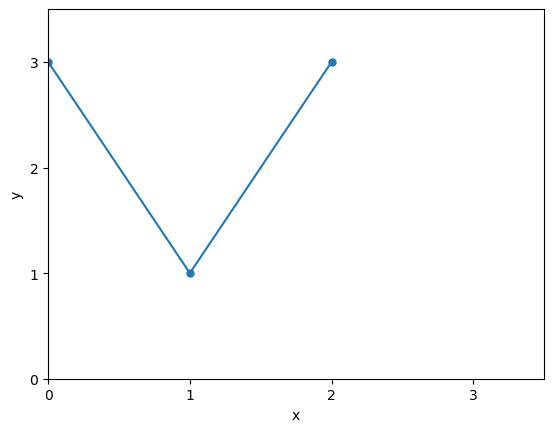

<Axes: >

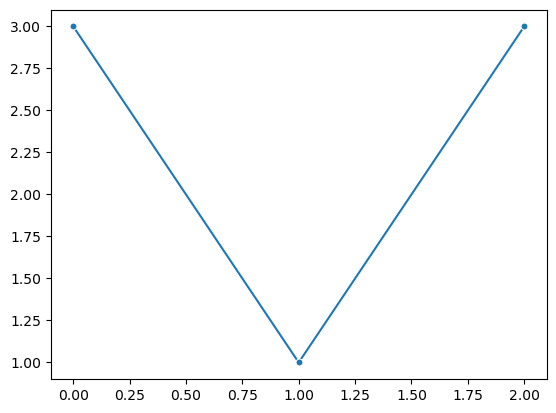

In [22]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")

coefficient_matrix = np.array([
    [3, 0, 0],
    [1, 5, -2],
    [1 / 3, 2, 0]
])
print(f"coefficient_matrix shape={coefficient_matrix.shape} ndim={coefficient_matrix.ndim}")

constant_vector = np.array([9, 2, 3])
print(f"constant_vector shape={constant_vector.shape} ndim={constant_vector.ndim}")

result = np.linalg.solve(coefficient_matrix, constant_vector)
print(type(result))
print(f"result shape={result.shape} ndim={result.ndim}")
print(result)

x1, x2, x3 = result
assert 3 == int(round(x1)), f"Actual value {x1}"
assert 1 == int(round(x2)), f"Actual value {x2}"
assert 3 == int(round(x3)), f"Actual value {x3}"

figure, axes = plt.subplots()
axes: plt.Axes
axes.plot(result, marker="o", markersize=5)
axes.set(
    xlim=(0, 3.5),
    ylim=(0, 3.5),
    xticks=np.arange(0, 4),
    yticks=np.arange(0, 4),
    xlabel="x",
    ylabel="y"
)
plt.show()
axes.clear()

sns.lineplot(result, marker="o", markersize=5)

In [80]:
import scipy

print(f"SciPy version: {scipy.__version__}")

coefficient_matrix = [
    [3, 0, 0],
    [1, 5, -2],
    [1/3, 2, 0]
]
constant_vector = [9, 2, 3]

result = scipy.linalg.solve(coefficient_matrix, constant_vector)
print(type(result))
print(f"result shape={result.shape} ndim={result.ndim}")
print(result)

x1, x2, x3 = result
assert 3 == int(round(x1)), f"Actual value {x1}"
assert 1 == int(round(x2)), f"Actual value {x2}"
assert 3 == int(round(x3)), f"Actual value {x3}"

SciPy version: 1.13.1
<class 'numpy.ndarray'>
result shape=(3,) ndim=1
[3. 1. 3.]


In [74]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")

coefficient_matrix = tf.constant([
    [3, 0, 0],
    [1, 5, -2],
    [1/3, 2, 0]
], dtype=tf.float32)
print(f"coefficient_matrix shape={coefficient_matrix.shape} ndim={coefficient_matrix.ndim}")

constant_vector = tf.constant([9, 2, 3], dtype=tf.float32)
print(f"constant_vector shape={constant_vector.shape} ndim={constant_vector.ndim}")
constant_vector = tf.reshape(constant_vector, (-1, 1))  # Reshape to a column vector
print(f"constant_vector shape={constant_vector.shape} ndim={constant_vector.ndim}")

result = tf.linalg.solve(coefficient_matrix, constant_vector)
result = tf.squeeze(result)

print(type(result))
print(f"result shape={result.shape} ndim={result.ndim}")
print(result)

x1, x2, x3 = result
assert tf.math.equal(x1, 3)
assert tf.math.equal(x2, 1)
assert tf.math.equal(x3, 3)

TensorFlow version: 2.16.2
coefficient_matrix shape=(3, 3) ndim=2
constant_vector shape=(3,) ndim=1
constant_vector shape=(3, 1) ndim=2
<class 'tensorflow.python.framework.ops.EagerTensor'>
result shape=(3,) ndim=1
tf.Tensor([3. 1. 3.], shape=(3,), dtype=float32)
